In [ ]:
import pandas as pd

In [ ]:
try:
    df = pd.read_csv('/content/Sample - Superstore.csv', encoding='latin-1')
    print("the file is loaded")
    print(df.head())
except UnicodeDecodeError as e:
    print(f"failed: {e}")

the file is loaded
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

###Data Cleaning

##EDA

In [ ]:
print(df.head())  # 5 first rows
print(df.tail(3)) # 3 last rows

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
print(df.isnull().sum())  ## based on the results, only 'Postal Code' has 11 null values

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [ ]:
print(df.shape)  ## datasize

(9994, 21)


In [ ]:
print(df.describe(include='all'))

             Row ID        Order ID Order Date   Ship Date       Ship Mode  \
count   9994.000000            9994       9994        9994            9994   
unique          NaN            5009       1237        1334               4   
top             NaN  CA-2017-100111   9/5/2016  12/16/2015  Standard Class   
freq            NaN              14         38          35            5968   
mean    4997.500000             NaN        NaN         NaN             NaN   
std     2885.163629             NaN        NaN         NaN             NaN   
min        1.000000             NaN        NaN         NaN             NaN   
25%     2499.250000             NaN        NaN         NaN             NaN   
50%     4997.500000             NaN        NaN         NaN             NaN   
75%     7495.750000             NaN        NaN         NaN             NaN   
max     9994.000000             NaN        NaN         NaN             NaN   

       Customer ID  Customer Name   Segment        Country     

In [ ]:
columns = ['Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']
for i in columns:
  print(df[i].value_counts(normalize=True))

Order ID
CA-2017-100111    0.001401
CA-2017-157987    0.001201
CA-2016-165330    0.001101
US-2016-108504    0.001101
US-2015-126977    0.001001
                    ...   
CA-2014-110422    0.000100
CA-2016-125794    0.000100
CA-2017-163566    0.000100
US-2015-151435    0.000100
CA-2016-130225    0.000100
Name: proportion, Length: 5009, dtype: float64
Order Date
9/5/2016      0.003802
9/2/2017      0.003602
11/10/2016    0.003502
12/1/2017     0.003402
12/2/2017     0.003402
                ...   
1/28/2016     0.000100
11/9/2016     0.000100
6/3/2016      0.000100
4/12/2015     0.000100
1/21/2014     0.000100
Name: proportion, Length: 1237, dtype: float64
Ship Date
12/16/2015    0.003502
9/26/2017     0.003402
11/21/2017    0.003202
12/6/2017     0.003202
9/6/2017      0.003002
                ...   
2/19/2016     0.000100
2/1/2015      0.000100
8/25/2016     0.000100
1/27/2014     0.000100
1/23/2014     0.000100
Name: proportion, Length: 1334, dtype: float64
Ship Mode
Standard Class  

## Null & duplicated values

In [ ]:
#find the column with the number of missing values
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
#find the number of duplicates
df.duplicated().sum()

np.int64(0)

## Data Type Transfer

In [ ]:
# datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

In [ ]:
# assign type 'str' to postal code
df['Postal Code'] = df['Postal Code'].astype(str).str.replace('.', '')

In [ ]:
postal_code_lengths = df['Postal Code'].str.len()
incorrect_length_mask = postal_code_lengths != 6

#all postal codes' length are proper

## Logic Check

In [ ]:
# order_date <= ship_date

is_ship_date_after_or_equal = df['Ship Date'] >= df['Order Date']
print(is_ship_date_after_or_equal.value_counts())

True    9994
Name: count, dtype: int64


In [ ]:
# each city belong to the unique state
city_state_unique_counts = df.groupby('City')['State'].nunique()

cities_in_multiple_states = city_state_unique_counts[city_state_unique_counts > 1]

print("\n citys beling to more than 1 state:")
print(len(cities_in_multiple_states))


 citys beling to more than 1 state:
57


In [ ]:
# add new column: city-state
df['City_State'] = df['City'] + ' (' + df['State'] + ')'

In [ ]:
# sub-category belong to the uniqiue category
sub_cat_cnt = df.groupby('Sub-Category')['Category'].nunique()

greater_than_1_cat = sub_cat_cnt[sub_cat_cnt>1]
print(greater_than_1_cat)

# no unresonable sub-category

Series([], Name: Category, dtype: int64)


In [ ]:
# output
df_processed = df.to_csv('processed_sales_0514.csv')

###Pareto Analysis（80/20）

Purpose: To verify whether “the top 20% of customers contribute 80% of sales”.

1. 分析步骤：
按客户聚合销售额
按销售额降序排序客户
计算累计销售额占比
识别累计前20%客户
可视化累计销售贡献

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# read data
df = pd.read_csv('/content/processed_sales_0514.csv', encoding='latin-1')

# Step 1: Aggregate sales by customer
customer_sales = df.groupby('Customer ID')['Sales'].sum().reset_index()

# Step 2: Sort by sales
customer_sales = customer_sales.sort_values(by='Sales', ascending=False).reset_index(drop=True)

# Step 3: Calculate the cumulative sales share and customer share
customer_sales['CumSales'] = customer_sales['Sales'].cumsum()
customer_sales['SalesPct'] = customer_sales['CumSales'] / customer_sales['Sales'].sum()
customer_sales['CustomerPct'] = (customer_sales.index + 1) / len(customer_sales)

# Find the Pareto turning point (SalesPct >= 0.8)
pareto_cutoff = customer_sales[customer_sales['SalesPct'] >= 0.8].iloc[0]
print(f"The proportion of customers required to achieve 80% of sales：{round(pareto_cutoff['CustomerPct'] * 100, 2)}%")

The proportion of customers required to achieve 80% of sales：49.94%


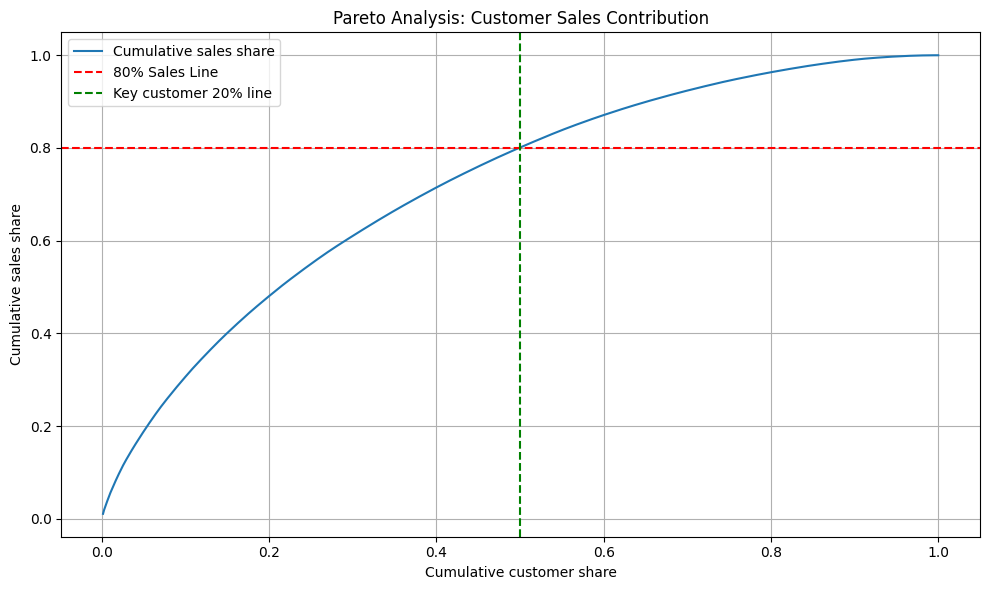

In [ ]:
# Step 5: Visiulation
plt.figure(figsize=(10, 6))
plt.plot(customer_sales['CustomerPct'], customer_sales['SalesPct'], label='Cumulative sales share')
plt.axhline(0.8, color='red', linestyle='--', label='80% Sales Line')
plt.axvline(pareto_cutoff['CustomerPct'], color='green', linestyle='--', label='Key customer 20% line')
plt.title('Pareto Analysis: Customer Sales Contribution')
plt.xlabel('Cumulative customer share')
plt.ylabel('Cumulative sales share')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### RFM -- Customer Behavior Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read data
df = pd.read_csv('/content/processed_sales_0514.csv', encoding='latin-1', parse_dates=['Order Date'])

# Set the analysis date (take the maximum order date in the data + 1 day)
snapshot_date = df['Order Date'].max() + pd.Timedelta(days=1)

# Calculate R/F/M by customer group
rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Order ID': 'nunique',                                   # Frequency
    'Sales': 'sum'                                           # Monetary
}).reset_index()

# Rename the columns
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']



In [ ]:
# Each dimension is divided into 5 points, with higher scores indicating more "excellent"
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Calcuate total score
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)


In [ ]:
def rfm_level(score):
    if score >= 13:
        return 'Important high-value customers'
    elif score >= 9:
        return 'Potential customers'
    elif score >= 5:
        return 'Normal customers'
    else:
        return 'Lost customers'

rfm['Segment'] = rfm['RFM_Score'].apply(rfm_level)


<ipython-input-15-8d2b4a7042f1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segment', data=rfm, order=rfm['Segment'].value_counts().index, palette='Set2')


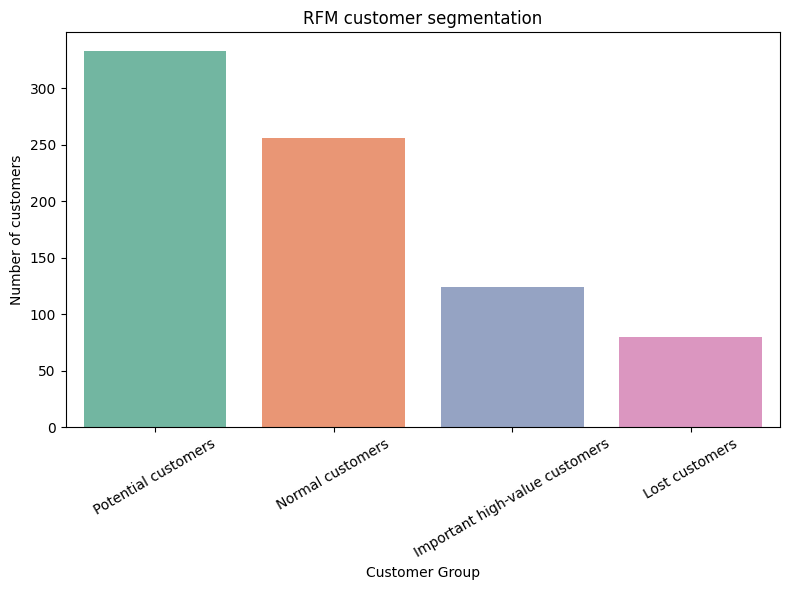

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Segment', data=rfm, order=rfm['Segment'].value_counts().index, palette='Set2')
plt.title('RFM customer segmentation')
plt.xlabel('Customer Group')
plt.ylabel('Number of customers')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
